<a href="https://colab.research.google.com/github/takayama-rado/trado_samples/blob/main/colab_files/gislr_simple_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Download dataset and modules

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Copy to local.
!cp drive/MyDrive/Datasets/gislr_dataset_top30.zip gislr_top30.zip

In [3]:
!unzip -o gislr_top30.zip

Archive:  gislr_top30.zip
   creating: dataset_top30/
  inflating: dataset_top30/16069.hdf5  
  inflating: dataset_top30/18796.hdf5  
  inflating: dataset_top30/2044.hdf5  
  inflating: dataset_top30/22343.hdf5  
  inflating: dataset_top30/25571.hdf5  
  inflating: dataset_top30/26734.hdf5  
  inflating: dataset_top30/27610.hdf5  
  inflating: dataset_top30/28656.hdf5  
  inflating: dataset_top30/29302.hdf5  
  inflating: dataset_top30/30680.hdf5  
  inflating: dataset_top30/32319.hdf5  
  inflating: dataset_top30/34503.hdf5  
  inflating: dataset_top30/36257.hdf5  
  inflating: dataset_top30/37055.hdf5  
  inflating: dataset_top30/37779.hdf5  
  inflating: dataset_top30/4718.hdf5  
  inflating: dataset_top30/49445.hdf5  
  inflating: dataset_top30/53618.hdf5  
  inflating: dataset_top30/55372.hdf5  
  inflating: dataset_top30/61333.hdf5  
  inflating: dataset_top30/62590.hdf5  
  inflating: dataset_top30/LICENSE.txt  
  inflating: dataset_top30/sign_to_prediction_index_map.json  


In [4]:
!ls dataset_top30

16069.hdf5  25571.hdf5	29302.hdf5  36257.hdf5	49445.hdf5  62590.hdf5
18796.hdf5  26734.hdf5	30680.hdf5  37055.hdf5	53618.hdf5  LICENSE.txt
2044.hdf5   27610.hdf5	32319.hdf5  37779.hdf5	55372.hdf5  sign_to_prediction_index_map.json
22343.hdf5  28656.hdf5	34503.hdf5  4718.hdf5	61333.hdf5


In [5]:
!cat dataset_top30/sign_to_prediction_index_map.json

{
    "listen": 0,
    "look": 1,
    "shhh": 2,
    "donkey": 3,
    "mouse": 4,
    "duck": 5,
    "uncle": 6,
    "hear": 7,
    "pretend": 8,
    "cow": 9,
    "bird": 10,
    "brown": 11,
    "who": 12,
    "sleepy": 13,
    "toothbrush": 14,
    "nuts": 15,
    "lips": 16,
    "bye": 17,
    "fireman": 18,
    "wake": 19,
    "awake": 20,
    "doll": 21,
    "cat": 22,
    "drink": 23,
    "pen": 24,
    "think": 25,
    "icecream": 26,
    "make": 27,
    "yesterday": 28,
    "first": 29
}

In [6]:
!cat dataset_top30/LICENSE.txt

The dataset provided by Natsuki Takayama (Takayama Research and Development Office) is licensed under CC-BY 4.0.
Author: Copyright 2024 Natsuki Takayama
Title: GISLR Top 30 dataset
Original licenser: Deaf Professional Arts Network and the Georgia Institute of Technology
Modification
- Extract 30 most frequent words.
- Packaged into HDF5 format.


In [7]:
import h5py
with h5py.File("dataset_top30/16069.hdf5", "r") as fread:
    keys = list(fread.keys())
    print(keys)
    group = fread[keys[0]]
    print(group.keys())
    feature = group["feature"][:]
    token = group["token"][:]
    print(feature.shape)
    print(token)

['1007589714', '1044708688', '1051872288', '106311451', '1063508354', '1089254635', '1105184045', '1106598067', '1109479272', '11121526', '111646172', '1120349077', '1122594000', '1125456612', '1130097536', '1159046211', '1169128497', '1176744362', '1186032553', '1223803476', '1232419581', '1240637686', '1240748051', '1259708636', '1260347115', '1265600035', '1273396593', '1280623057', '1281972067', '1287801400', '1288642945', '129232566', '1297410552', '1307707679', '1309547469', '1315438272', '1316154330', '132004208', '1329199537', '1334702305', '1337455914', '1340979012', '1347884446', '1351648568', '1352964057', '1353431421', '1365624386', '1370052047', '1383455381', '1387948826', '1393187037', '1405986247', '1407038293', '1412211327', '1413817535', '1424179671', '1431148933', '1433306289', '1435203624', '1437919781', '1441784356', '1444648202', '1446197464', '1448758512', '1458770030', '146045471', '1462881097', '1469867050', '1474050058', '147607644', '1476927533', '1486392132',

In [8]:
!wget https://github.com/takayama-rado/trado_samples/archive/master.zip

--2024-03-09 01:11:21--  https://github.com/takayama-rado/trado_samples/archive/master.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/takayama-rado/trado_samples/zip/main [following]
--2024-03-09 01:11:21--  https://codeload.github.com/takayama-rado/trado_samples/zip/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [            <=>     ]  74.12M  19.0MB/s    in 3.9s    

2024-03-09 01:11:25 (19.0 MB/s) - ‘master.zip’ saved [77722393]



In [9]:
!unzip -o master.zip -d master

Archive:  master.zip
1b4a5b14e8e869a1db74dc804ee31896631e07a2
   creating: master/trado_samples-main/
  inflating: master/trado_samples-main/.gitignore  
  inflating: master/trado_samples-main/LICENSE  
  inflating: master/trado_samples-main/README.md  
   creating: master/trado_samples-main/colab_files/
 extracting: master/trado_samples-main/colab_files/.gitkeep  
  inflating: master/trado_samples-main/colab_files/exp_affine_np_einsum.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_jax_static.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpholistic_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpothers_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_jax.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_numpy.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_tensorflow.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_torch.ipynb

In [10]:
!mv master/trado_samples-main/src/modules_gislr .

In [11]:
!rm -rf master master.zip gislr_top30.zip

In [12]:
!ls

dataset_top30  drive  modules_gislr  sample_data


# 2. Load library

In [13]:
import json
import math
import os
import sys
from functools import partial
from pathlib import Path
from typing import (
    Any,
    Dict
)

# Third party's modules
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import (
    DataLoader)

from torchvision.transforms import Compose

# Local modules
sys.path.append("modules_gislr")
from modules_gislr.dataset import (
    HDF5Dataset,
    merge_padded_batch)
from modules_gislr.defines import (
    get_fullbody_landmarks
)
from modules_gislr.layers import (
    GPoolRecognitionHead,
    RNNEncoder
)
from modules_gislr.train_functions import (
    test_loop,
    val_loop,
    train_loop
)
from modules_gislr.transforms import (
    PartsBasedNormalization,
    ReplaceNan,
    SelectLandmarksAndFeature,
    ToTensor
)

# 3. Implement RNN ISLR model

## ISLR model

In [14]:
class TemporalAttention(nn.Module):
    def __init__(self,
                 in_channels,
                 attention_type,
                 post_scale):
        super().__init__()
        assert attention_type in ["sigmoid", "softmax"]
        self.linear = nn.Linear(in_channels, 1)
        self.attention_type = attention_type

        if attention_type == "sigmoid":
            self.scale_layer = nn.Sigmoid()
        elif attention_type == "softmax":
            self.scale_layer = nn.Softmax(dim=1)

        self.neg_inf = None
        self.post_scale = post_scale

    def calc_attw(self, attw, mask):
        # Initialize masking value.
        if self.neg_inf is None:
            self.neg_inf = float(np.finfo(
                torch.tensor(0, dtype=attw.dtype).numpy().dtype).min)
        if mask is not None:
            attw = attw.masked_fill_(mask[:, :, None] == 0, self.neg_inf)
        attw = self.scale_layer(attw)
        if self.post_scale:
            if mask is None:
                tlength = torch.tensor(attw.shape[1], dtype=attw.dtype, device=attw.device)
                tlength = tlength.reshape([1, 1, 1])
            else:
                tlength = mask.sum(dim=1)
                tlength = tlength.reshape([-1, 1, 1])
            scale = tlength / attw.sum(dim=1, keepdims=True)
            attw = attw * scale
        return attw

    def forward(self, feature, mask=None):
        # `[N, T, C]`
        attw = self.linear(feature)
        attw = self.calc_attw(attw, mask)
        feature = attw * feature
        return feature, attw

In [15]:
class Identity(nn.Module):
    """Place holder layer to return identity vector.
    """
    # This design is on purpose.
    # pylint: disable=unused-argument
    def __init__(self, *args, **kwargs):
        super().__init__()

    def forward(self, feature, *args, **kwargs):
        """Perform forward computation.
        """
        return feature

In [16]:
class RNNISLR(nn.Module):
    def __init__(self,
                 in_channels,
                 hidden_channels,
                 out_channels,
                 rnn_type="lstm",
                 rnn_num_layers=1,
                 rnn_activation="tanh",
                 rnn_bidir=False,
                 rnn_dropout=0.1,
                 masking_type="both",
                 attention_type="none",
                 attention_post_scale=False):
        super().__init__()
        assert rnn_type in ["srnn", "lstm", "gru"]
        assert masking_type in ["none", "rnn", "head", "both"]
        assert attention_type in ["none", "sigmoid", "softmax"]

        self.linear = nn.Linear(in_channels, hidden_channels)
        self.activation = nn.ReLU()

        apply_mask = True if masking_type in ["rnn", "both"] else False
        self.rnn = RNNEncoder(
            in_channels=hidden_channels,
            out_channels=hidden_channels,
            rnn_type=rnn_type,
            num_layers=rnn_num_layers,
            activation=rnn_activation,
            bidir=rnn_bidir,
            dropout=rnn_dropout,
            apply_mask=apply_mask)

        if attention_type != "none":
            if rnn_bidir:
                self.att = TemporalAttention(hidden_channels * 2, attention_type,
                                             post_scale=attention_post_scale)
            else:
                self.att = TemporalAttention(hidden_channels, attention_type,
                                             post_scale=attention_post_scale)
        else:
            self.att = Identity()
        self.attw = None

        if rnn_bidir:
            self.head = GPoolRecognitionHead(hidden_channels * 2, out_channels)
        else:
            self.head = GPoolRecognitionHead(hidden_channels, out_channels)

        self.masking_type = masking_type

    def forward(self, feature, feature_pad_mask=None):
        # Feature extraction.
        # `[N, C, T, J] -> [N, T, C, J] -> [N, T, C*J] -> [N, T, C']`
        N, C, T, J = feature.shape
        feature = feature.permute([0, 2, 1, 3])
        feature = feature.reshape(N, T, -1)

        feature = self.linear(feature)
        feature = self.activation(feature)

        hidden_seqs, last_hstate = self.rnn(feature, feature_pad_mask)[:2]

        # Apply attention.
        hidden_seqs = self.att(hidden_seqs, feature_pad_mask)
        if isinstance(hidden_seqs, (tuple, list)):
            hidden_seqs, self.attw = hidden_seqs[0], hidden_seqs[1]

        # `[N, T, C'] -> [N, C', T]`
        feature = hidden_seqs.permute(0, 2, 1)

        if feature_pad_mask is not None and self.masking_type in ["head", "both"]:
            logit = self.head(feature, feature_pad_mask)
        else:
            logit = self.head(feature)
        return logit

## Sanity check

In [17]:
# Access check.
dataset_dir = Path("dataset_top30")
files = list(dataset_dir.iterdir())
dictionary = [fin for fin in files if ".json" in fin.name][0]
hdf5_files = [fin for fin in files if ".hdf5" in fin.name]

print(dictionary)
print(hdf5_files)

dataset_top30/sign_to_prediction_index_map.json
[PosixPath('dataset_top30/2044.hdf5'), PosixPath('dataset_top30/25571.hdf5'), PosixPath('dataset_top30/37779.hdf5'), PosixPath('dataset_top30/34503.hdf5'), PosixPath('dataset_top30/29302.hdf5'), PosixPath('dataset_top30/32319.hdf5'), PosixPath('dataset_top30/16069.hdf5'), PosixPath('dataset_top30/49445.hdf5'), PosixPath('dataset_top30/62590.hdf5'), PosixPath('dataset_top30/61333.hdf5'), PosixPath('dataset_top30/4718.hdf5'), PosixPath('dataset_top30/36257.hdf5'), PosixPath('dataset_top30/18796.hdf5'), PosixPath('dataset_top30/55372.hdf5'), PosixPath('dataset_top30/27610.hdf5'), PosixPath('dataset_top30/28656.hdf5'), PosixPath('dataset_top30/37055.hdf5'), PosixPath('dataset_top30/53618.hdf5'), PosixPath('dataset_top30/26734.hdf5'), PosixPath('dataset_top30/30680.hdf5'), PosixPath('dataset_top30/22343.hdf5')]


In [18]:
# Load dictionary.
with open(dictionary, "r") as fread:
    key2token = json.load(fread)

VOCAB = len(key2token)

In [19]:
_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]
trans_select_feature = SelectLandmarksAndFeature(landmarks=use_landmarks, features=use_features)
trans_repnan = ReplaceNan()
trans_norm = PartsBasedNormalization(align_mode="framewise", scale_mode="unique")

pre_transforms = Compose([trans_select_feature,
                          trans_repnan,
                          trans_norm])
transforms = Compose([ToTensor()])

In [20]:
batch_size = 2
feature_shape = (len(use_features), -1, len(use_landmarks))
token_shape = (1,)
merge_fn = partial(merge_padded_batch,
                   feature_shape=feature_shape,
                   token_shape=token_shape,
                   feature_padding_val=0.0,
                   token_padding_val=0)

dataset = HDF5Dataset(hdf5_files, pre_transforms=pre_transforms, transforms=transforms)

dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=merge_fn)
try:
    data = next(iter(dataloader))
    feature_origin = data["feature"]

    print(feature_origin.shape)
except Exception as inst:
    print(inst)

torch.Size([2, 2, 24, 130])


In [21]:
# Define model.
# in_channels: J * C (130*2=260)
#   J: use_landmarks (130)
#   C: use_channels (2)
# out_channels: 10
in_channels = len(use_landmarks) * len(use_features)
hidden_channels = 64
out_channels = VOCAB
rnn_type="gru"
rnn_num_layers=2
rnn_bidir=True
rnn_dropout=0.1
masking_type="both"
attention_type = "sigmoid"
attention_post_scale = True

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_num_layers=rnn_num_layers,
                rnn_bidir=rnn_bidir,
                masking_type=masking_type,
                attention_type=attention_type,
                attention_post_scale=attention_post_scale)
print(model)

# Sanity check.
logit = model(feature_origin)
print(logit.shape)
attw = model.attw.detach().cpu().numpy()
print(attw.max())
print(attw.sum())

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): GRU(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  )
  (att): TemporalAttention(
    (linear): Linear(in_features=128, out_features=1, bias=True)
    (scale_layer): Sigmoid()
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=30, bias=True)
  )
)
torch.Size([2, 30])
1.0101321
48.0


# 4. Train and evaluation

## 4.1 Set common parameters.

In [22]:
# Set common parameters.
batch_size = 256
load_into_ram = True
test_pid = 16069
num_workers = os.cpu_count()
print(f"Using {num_workers} cores for data loading.")
lr = 3e-4

epochs = 50
eval_every_n_epochs = 1
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} for computation.")

train_hdf5files = [fin for fin in hdf5_files if str(test_pid) not in fin.name]
val_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]
test_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]

_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]

Using 2 cores for data loading.
Using cuda for computation.


In [23]:
# Build dataloaders.
train_dataset = HDF5Dataset(train_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(val_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(test_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

## 4.2 Run training process

### Default settings

In [24]:
rnn_type="gru"
rnn_num_layers = 2
rnn_bidir = True
masking_type = "both"
attention_type = "none"
attention_post_scale = False

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_num_layers=rnn_num_layers,
                rnn_bidir=rnn_bidir,
                masking_type=masking_type,
                attention_type=attention_type,
                attention_post_scale=attention_post_scale)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): GRU(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  )
  (att): Identity()
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=30, bias=True)
  )
)


In [25]:
# Train, validation, and evaluation.
model.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
train_losses_default = np.array(train_losses)
val_losses_default = np.array(val_losses)
test_accs_default = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_default.min()} at {np.argmin(val_losses_default)+1} epoch.")
print(f"Maximum accuracy:{test_accs_default.max()} at {np.argmax(test_accs_default)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.464429 [    0/11480]
Done. Time:17.91022293399999
Training performance: 
 Avg loss:3.330336

Start validation.
Done. Time:0.8157507599999576
Validation performance: 
 Avg loss:3.249739

Start evaluation.
Done. Time:2.4373420780000288
Test performance: 
 Accuracy:7.6%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:3.161668 [    0/11480]
Done. Time:14.637726224999994
Training performance: 
 Avg loss:2.887213

Start validation.
Done. Time:0.6558960120000279
Validation performance: 
 Avg loss:2.760348

Start evaluation.
Done. Time:2.29071747200004
Test performance: 
 Accuracy:20.8%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:2.607834 [    0/11480]
Done. Time:14.828304038999988
Training performance: 
 Avg loss:2.450254

Start validation.


### Apply sigmoid attention without post scale

In [26]:
rnn_type="gru"
rnn_num_layers = 2
rnn_bidir = True
masking_type = "both"
attention_type = "sigmoid"
attention_post_scale = False

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_num_layers=rnn_num_layers,
                rnn_bidir=rnn_bidir,
                masking_type=masking_type,
                attention_type=attention_type,
                attention_post_scale=attention_post_scale)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): GRU(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  )
  (att): TemporalAttention(
    (linear): Linear(in_features=128, out_features=1, bias=True)
    (scale_layer): Sigmoid()
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=30, bias=True)
  )
)


In [27]:
# Train, validation, and evaluation.
model.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
train_losses_sigmoid_attention_wo_post_scale = np.array(train_losses)
val_losses_sigmoid_attention_wo_post_scale = np.array(val_losses)
test_accs_sigmoid_attention_wo_post_scale = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_sigmoid_attention_wo_post_scale.min()} at {np.argmin(val_losses_sigmoid_attention_wo_post_scale)+1} epoch.")
print(f"Maximum accuracy:{test_accs_sigmoid_attention_wo_post_scale.max()} at {np.argmax(test_accs_sigmoid_attention_wo_post_scale)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.398966 [    0/11480]
Done. Time:15.180150986999934
Training performance: 
 Avg loss:3.348897

Start validation.
Done. Time:0.7012562699999307
Validation performance: 
 Avg loss:3.261163

Start evaluation.
Done. Time:3.4660820990000047
Test performance: 
 Accuracy:7.3%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:3.203452 [    0/11480]
Done. Time:13.965214710000055
Training performance: 
 Avg loss:2.923381

Start validation.
Done. Time:1.3415067319999707
Validation performance: 
 Avg loss:2.750905

Start evaluation.
Done. Time:3.256365685999981
Test performance: 
 Accuracy:14.9%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:2.691933 [    0/11480]
Done. Time:14.406579531000034
Training performance: 
 Avg loss:2.441326

Start validation

0.9976247
11.879345


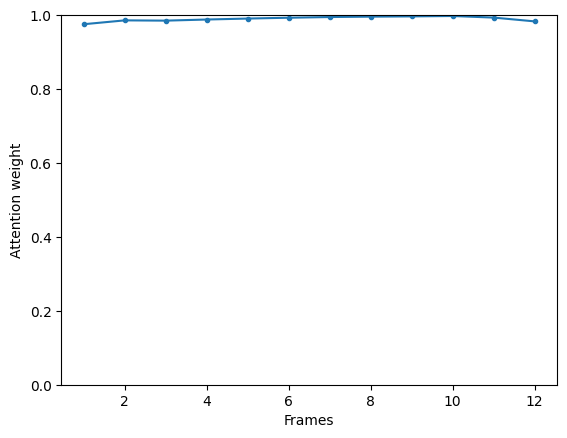

In [28]:
import matplotlib.pyplot as plt

test_iter = iter(test_dataloader)
data = next(test_iter)
feature = data["feature"].to(device)

logit = model(feature)

attw = model.attw.detach().cpu().numpy()
print(attw.max())
print(attw.sum())
attw = attw.reshape([-1])
frames = np.arange(1, attw.shape[0]+1)

plt.plot(frames, attw, marker=".")
plt.xlabel("Frames")
plt.ylabel("Attention weight")
plt.ylim([0.0, max(1.0, attw.max())])
plt.show()

0.9999058
19.990292


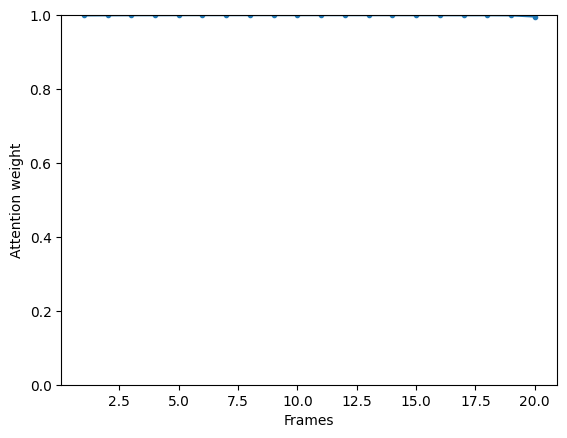

In [29]:
data = next(test_iter)
feature = data["feature"].to(device)

logit = model(feature)

attw = model.attw.detach().cpu().numpy()
print(attw.max())
print(attw.sum())
attw = attw.reshape([-1])
frames = np.arange(1, attw.shape[0]+1)

plt.plot(frames, attw, marker=".")
plt.xlabel("Frames")
plt.ylabel("Attention weight")
plt.ylim([0.0, max(1.0, attw.max())])
plt.show()

### Apply sigmoid attention with post scale

In [30]:
rnn_type="gru"
rnn_num_layers = 2
rnn_bidir = True
masking_type = "both"
attention_type = "sigmoid"
attention_post_scale = True

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_num_layers=rnn_num_layers,
                rnn_bidir=rnn_bidir,
                masking_type=masking_type,
                attention_type=attention_type,
                attention_post_scale=attention_post_scale)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): GRU(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  )
  (att): TemporalAttention(
    (linear): Linear(in_features=128, out_features=1, bias=True)
    (scale_layer): Sigmoid()
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=30, bias=True)
  )
)


In [31]:
# Train, validation, and evaluation.
model.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
train_losses_sigmoid_attention_w_post_scale = np.array(train_losses)
val_losses_sigmoid_attention_w_post_scale = np.array(val_losses)
test_accs_sigmoid_attention_w_post_scale = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_sigmoid_attention_w_post_scale.min()} at {np.argmin(val_losses_sigmoid_attention_w_post_scale)+1} epoch.")
print(f"Maximum accuracy:{test_accs_sigmoid_attention_w_post_scale.max()} at {np.argmax(test_accs_sigmoid_attention_w_post_scale)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.402132 [    0/11480]
Done. Time:13.905337041000166
Training performance: 
 Avg loss:3.324600

Start validation.
Done. Time:1.1192836729996998
Validation performance: 
 Avg loss:3.216083

Start evaluation.
Done. Time:2.745283054000083
Test performance: 
 Accuracy:11.4%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:3.149378 [    0/11480]
Done. Time:14.968564050000168
Training performance: 
 Avg loss:2.877087

Start validation.
Done. Time:0.702221733999977
Validation performance: 
 Avg loss:2.762981

Start evaluation.
Done. Time:2.5006353320000017
Test performance: 
 Accuracy:19.2%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:2.665231 [    0/11480]
Done. Time:14.708667580999645
Training performance: 
 Avg loss:2.404965

Start validation

2.9707065
12.0


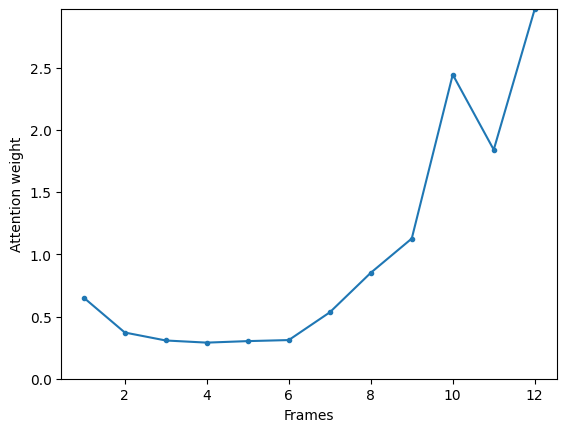

In [32]:
import matplotlib.pyplot as plt

test_iter = iter(test_dataloader)
data = next(test_iter)
feature = data["feature"].to(device)

logit = model(feature)

attw = model.attw.detach().cpu().numpy()
print(attw.max())
print(attw.sum())
attw = attw.reshape([-1])
frames = np.arange(1, attw.shape[0]+1)

plt.plot(frames, attw, marker=".")
plt.xlabel("Frames")
plt.ylabel("Attention weight")
plt.ylim([0.0, max(1.0, attw.max())])
plt.show()

3.690039
20.0


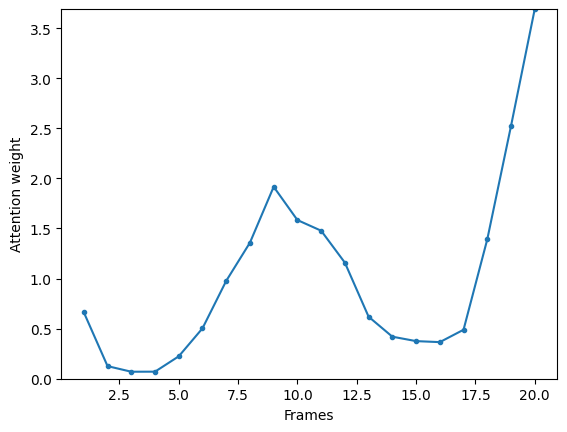

In [33]:
data = next(test_iter)
feature = data["feature"].to(device)

logit = model(feature)

attw = model.attw.detach().cpu().numpy()
print(attw.max())
print(attw.sum())
attw = attw.reshape([-1])
frames = np.arange(1, attw.shape[0]+1)

plt.plot(frames, attw, marker=".")
plt.xlabel("Frames")
plt.ylabel("Attention weight")
plt.ylim([0.0, max(1.0, attw.max())])
plt.show()

### Apply softmax attention without post scale

In [34]:
rnn_type="gru"
rnn_num_layers = 2
rnn_bidir = True
masking_type = "both"
attention_type = "softmax"
attention_post_scale = False

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_num_layers=rnn_num_layers,
                rnn_bidir=rnn_bidir,
                masking_type=masking_type,
                attention_type=attention_type,
                attention_post_scale=attention_post_scale)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): GRU(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  )
  (att): TemporalAttention(
    (linear): Linear(in_features=128, out_features=1, bias=True)
    (scale_layer): Softmax(dim=1)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=30, bias=True)
  )
)


In [35]:
# Train, validation, and evaluation.
model.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
train_losses_softmax_attention_wo_post_scale = np.array(train_losses)
val_losses_softmax_attention_wo_post_scale = np.array(val_losses)
test_accs_softmax_attention_wo_post_scale = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_softmax_attention_wo_post_scale.min()} at {np.argmin(val_losses_softmax_attention_wo_post_scale)+1} epoch.")
print(f"Maximum accuracy:{test_accs_softmax_attention_wo_post_scale.max()} at {np.argmax(test_accs_softmax_attention_wo_post_scale)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.404886 [    0/11480]
Done. Time:14.852841829000226
Training performance: 
 Avg loss:3.398029

Start validation.
Done. Time:0.6838467589996071
Validation performance: 
 Avg loss:3.391453

Start evaluation.
Done. Time:3.1339898139999605
Test performance: 
 Accuracy:4.9%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:3.388693 [    0/11480]
Done. Time:14.524904020000122
Training performance: 
 Avg loss:3.342519

Start validation.
Done. Time:1.09398215300007
Validation performance: 
 Avg loss:3.305581

Start evaluation.
Done. Time:2.4551847960001396
Test performance: 
 Accuracy:8.4%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:3.280357 [    0/11480]
Done. Time:15.132835973000056
Training performance: 
 Avg loss:3.213894

Start validation.


0.20394832
0.9999999


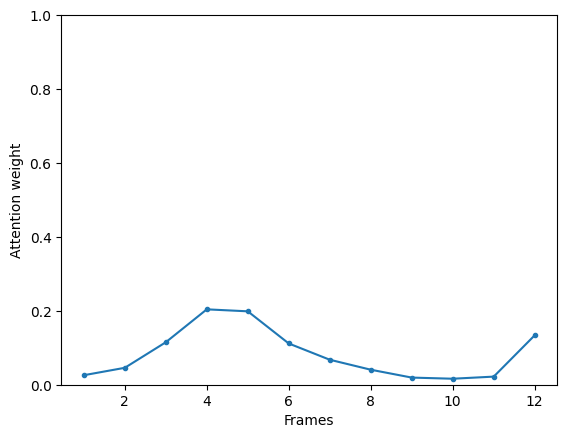

In [36]:
test_iter = iter(test_dataloader)
data = next(test_iter)
feature = data["feature"].to(device)

logit = model(feature)

attw = model.attw.detach().cpu().numpy()
print(attw.max())
print(attw.sum())
attw = attw.reshape([-1])
frames = np.arange(1, attw.shape[0]+1)

plt.plot(frames, attw, marker=".")
plt.xlabel("Frames")
plt.ylabel("Attention weight")
plt.ylim([0.0, max(1.0, attw.max())])
plt.show()

0.17617433
1.0


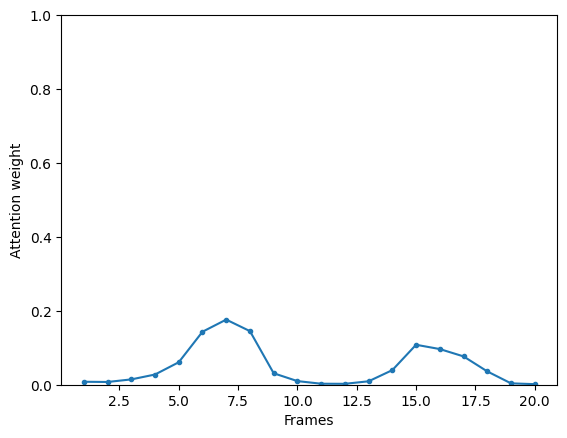

In [37]:
data = next(test_iter)
feature = data["feature"].to(device)

logit = model(feature)

attw = model.attw.detach().cpu().numpy()
print(attw.max())
print(attw.sum())
attw = attw.reshape([-1])
frames = np.arange(1, attw.shape[0]+1)

plt.plot(frames, attw, marker=".")
plt.xlabel("Frames")
plt.ylabel("Attention weight")
plt.ylim([0.0, max(1.0, attw.max())])
plt.show()

### Apply softmax attention with post scale

In [38]:
rnn_type="gru"
rnn_num_layers = 2
rnn_bidir = True
masking_type = "both"
attention_type = "softmax"
attention_post_scale = True

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_num_layers=rnn_num_layers,
                rnn_bidir=rnn_bidir,
                masking_type=masking_type,
                attention_type=attention_type,
                attention_post_scale=attention_post_scale)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): GRU(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  )
  (att): TemporalAttention(
    (linear): Linear(in_features=128, out_features=1, bias=True)
    (scale_layer): Softmax(dim=1)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=30, bias=True)
  )
)


In [39]:
# Train, validation, and evaluation.
model.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
train_losses_softmax_attention_w_post_scale = np.array(train_losses)
val_losses_softmax_attention_w_post_scale = np.array(val_losses)
test_accs_softmax_attention_w_post_scale = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_softmax_attention_w_post_scale.min()} at {np.argmin(val_losses_softmax_attention_w_post_scale)+1} epoch.")
print(f"Maximum accuracy:{test_accs_softmax_attention_w_post_scale.max()} at {np.argmax(test_accs_softmax_attention_w_post_scale)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.419321 [    0/11480]
Done. Time:15.10299656799998
Training performance: 
 Avg loss:3.333769

Start validation.
Done. Time:0.6894378749993848
Validation performance: 
 Avg loss:3.233163

Start evaluation.
Done. Time:2.7909806949992344
Test performance: 
 Accuracy:13.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:3.186597 [    0/11480]
Done. Time:15.045673212999645
Training performance: 
 Avg loss:2.879934

Start validation.
Done. Time:0.7052743410004041
Validation performance: 
 Avg loss:2.757408

Start evaluation.
Done. Time:2.583540370999799
Test performance: 
 Accuracy:20.9%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:2.492058 [    0/11480]
Done. Time:15.199126446999799
Training performance: 
 Avg loss:2.337423

Start validation

2.7518547
12.0


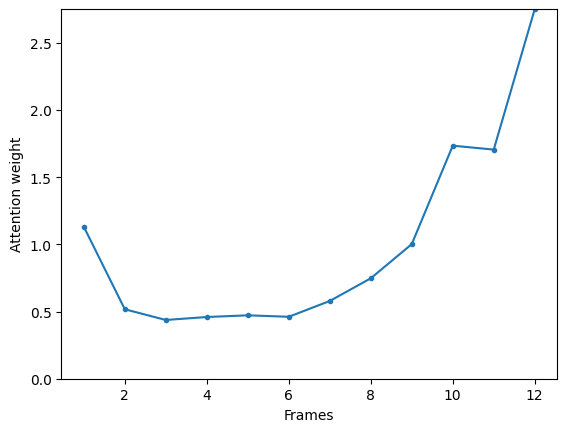

In [40]:
test_iter = iter(test_dataloader)
data = next(test_iter)
feature = data["feature"].to(device)

logit = model(feature)

attw = model.attw.detach().cpu().numpy()
print(attw.max())
print(attw.sum())
attw = attw.reshape([-1])
frames = np.arange(1, attw.shape[0]+1)

plt.plot(frames, attw, marker=".")
plt.xlabel("Frames")
plt.ylabel("Attention weight")
plt.ylim([0.0, max(1.0, attw.max())])
plt.show()

3.0367026
20.0


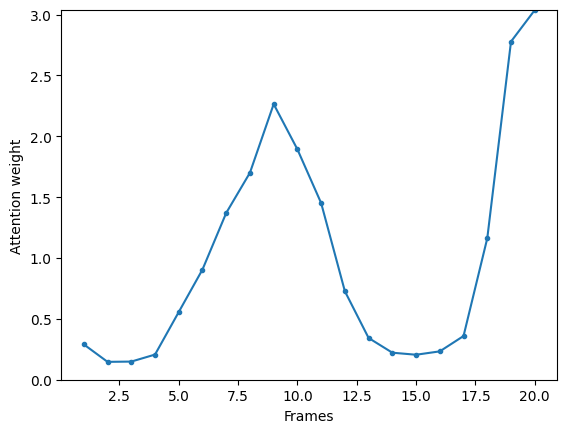

In [41]:
data = next(test_iter)
feature = data["feature"].to(device)

logit = model(feature)

attw = model.attw.detach().cpu().numpy()
print(attw.max())
print(attw.sum())
attw = attw.reshape([-1])
frames = np.arange(1, attw.shape[0]+1)

plt.plot(frames, attw, marker=".")
plt.xlabel("Frames")
plt.ylabel("Attention weight")
plt.ylim([0.0, max(1.0, attw.max())])
plt.show()

### Plort result

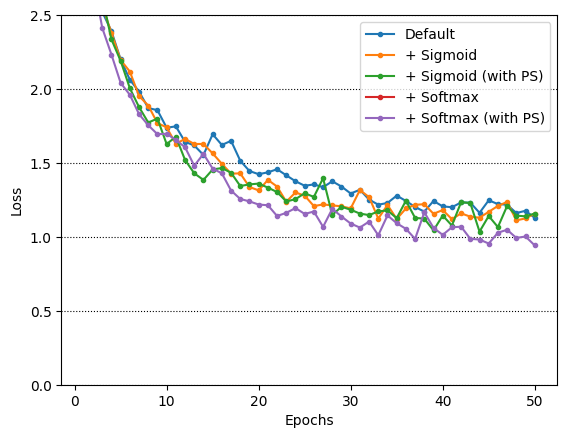

In [42]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_default)+1)
plt.plot(xs, val_losses_default, label="Default", marker=".")
plt.plot(xs, val_losses_sigmoid_attention_wo_post_scale, label="+ Sigmoid", marker=".")
plt.plot(xs, val_losses_sigmoid_attention_w_post_scale, label="+ Sigmoid (with PS)", marker=".")
plt.plot(xs, val_losses_softmax_attention_wo_post_scale, label="+ Softmax", marker=".")
plt.plot(xs, val_losses_softmax_attention_w_post_scale, label="+ Softmax (with PS)", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.0, 2.5])
plt.legend()
plt.show()

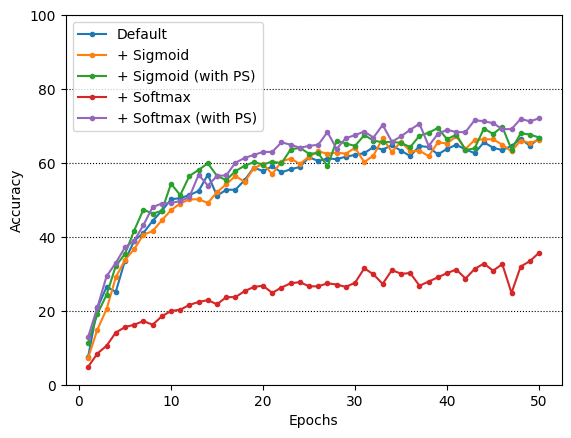

In [43]:
plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_accs_default)+1)
plt.plot(xs, test_accs_default, label="Default", marker=".")
plt.plot(xs, test_accs_sigmoid_attention_wo_post_scale, label="+ Sigmoid", marker=".")
plt.plot(xs, test_accs_sigmoid_attention_w_post_scale, label="+ Sigmoid (with PS)", marker=".")
plt.plot(xs, test_accs_softmax_attention_wo_post_scale, label="+ Softmax", marker=".")
plt.plot(xs, test_accs_softmax_attention_w_post_scale, label="+ Softmax (with PS)", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.0, 100.0])
plt.legend()
plt.show()